In [4]:
ls /playpen-nvme/tgreer/

ShapeNetCore.v2/


In [5]:
import glob

In [14]:
images = glob.glob("/playpen-nvme/tgreer/Sintel/training/final/market_6/*.png")
images.sort()

In [15]:
flow = glob.glob("/playpen-nvme/tgreer/Sintel/training/flow/market_6/*.flo")
flow.sort()

In [38]:
from PIL import Image
import numpy as np
Image.open(images[0]),Image.open(images[1])

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x436 at 0x7F67976DBCA0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x436 at 0x7F6794E239A0>)

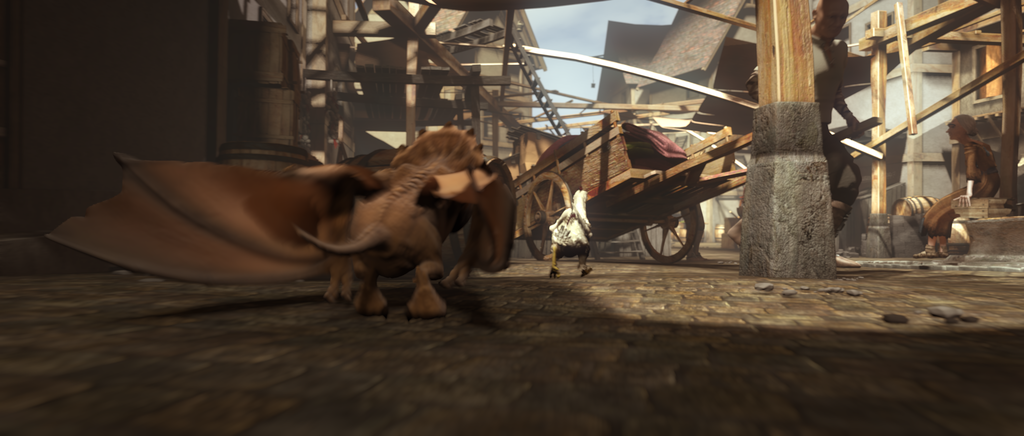

In [41]:
Image.open(images[0])

In [21]:
with open(flow[0], "rb") as f:
    flo = f.read()

In [24]:
np.frombuffer(flo[:4], np.float32)

array([202021.25], dtype=float32)

In [31]:
def open_flo(fname):
    with open(fname, "rb") as f:
        flo = f.read()
    assert np.frombuffer(flo[:4], np.float32)[0] == 202021.25
    width, height = np.frombuffer(flo[4:12], np.int32)
    values = np.frombuffer(flo[12:], np.float32)
    values = values.reshape(height, width, 2)
    return values


array([[[ -22.172562  ,   -7.662162  ],
        [ -22.096657  ,   -7.6450143 ],
        [ -22.02089   ,   -7.6278615 ],
        ...,
        [  -1.7367157 ,   -0.9231788 ],
        [  -1.7380064 ,   -0.92093575],
        [  -1.7395778 ,   -0.91855735]],

       [[ -22.171509  ,   -7.628368  ],
        [ -22.095613  ,   -7.611299  ],
        [ -22.019848  ,   -7.5942216 ],
        ...,
        [  -1.2426126 ,   -1.1764547 ],
        [  -1.7379775 ,   -0.9172023 ],
        [  -1.7391962 ,   -0.91498375]],

       [[ -22.170477  ,   -7.5945854 ],
        [ -22.094564  ,   -7.5775824 ],
        [ -22.018797  ,   -7.5605793 ],
        ...,
        [  -1.2425101 ,   -1.171625  ],
        [  -1.7379775 ,   -0.91344506],
        [  -1.7391963 ,   -0.91123074]],

       ...,

       [[-132.1061    ,   45.185516  ],
        [-131.87408   ,   45.182255  ],
        [-131.6421    ,   45.17899   ],
        ...,
        [  89.10586   ,   42.08476   ],
        [  89.30314   ,   42.07962   ],
        [

In [33]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


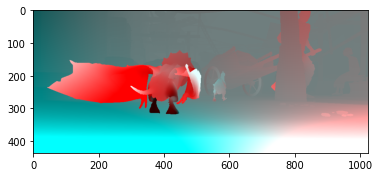

In [36]:
plt.imshow(open_flo(flow[0])[:, :, [0, 1, 1]] / 50 + .5)